In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
# Load themnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape,"x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


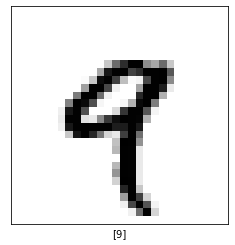

In [2]:
# Show one of the images from the training dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[4]])
plt.imshow(x_train[4],cmap=plt.cm.binary)

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [5]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
x_train = x_train.reshape(-1,28, 28,1) #Reshape for CNN 
x_test = x_test.reshape(-1,28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [8]:
model_log=model.fit(x_train, y_train,
          batch_size=60,
          epochs=10,
          verbose=1,
          validation_split=.3)

Epoch 1/10
700/700 [==============================] - 63s 89ms/step - loss: 0.4007 - accuracy: 0.8732 - val_loss: 0.1145 - val_accuracy: 0.9662
Epoch 2/10
700/700 [==============================] - 62s 89ms/step - loss: 0.1487 - accuracy: 0.9540 - val_loss: 0.0720 - val_accuracy: 0.9780
Epoch 3/10
700/700 [==============================] - 61s 87ms/step - loss: 0.1093 - accuracy: 0.9651 - val_loss: 0.0594 - val_accuracy: 0.9816
Epoch 4/10
700/700 [==============================] - 62s 89ms/step - loss: 0.0901 - accuracy: 0.9710 - val_loss: 0.0520 - val_accuracy: 0.9834
Epoch 5/10
700/700 [==============================] - 63s 90ms/step - loss: 0.0824 - accuracy: 0.9741 - val_loss: 0.0512 - val_accuracy: 0.9842
Epoch 6/10
700/700 [==============================] - 61s 88ms/step - loss: 0.0696 - accuracy: 0.9777 - val_loss: 0.0461 - val_accuracy: 0.9854
Epoch 7/10
700/700 [==============================] - 61s 87ms/step - loss: 0.0684 - accuracy: 0.9785 - val_loss: 0.0429 - val_accuracy:

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9868999719619751


In [9]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 4s 11ms/step


array([9.4744941e-12, 3.7413610e-09, 6.3241956e-08, 2.8674863e-08,
       4.5148299e-12, 3.1464234e-12, 4.6498962e-17, 9.9999982e-01,
       1.0600269e-11, 3.9327261e-08], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [10]:
x_test = x_test.reshape(-1,28, 28)
x_test.shape

(10000, 28, 28)

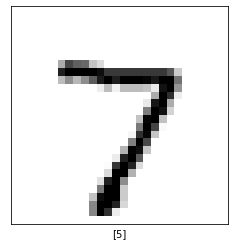

In [11]:
# Show one of the images from the test dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[0]])
plt.imshow(x_test[0],cmap=plt.cm.binary)

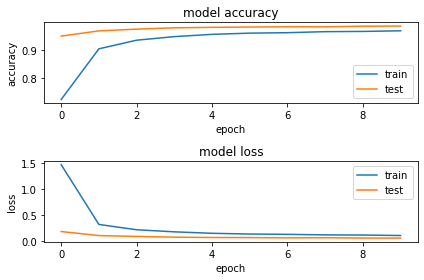

In [ ]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()